<a href="https://colab.research.google.com/github/baalasangar/GLHackathon/blob/main/variance_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The biggest challenge of Machine Learning is to create models that have robust predictive power by using as few features as possible. But given the massive sizes of today’s datasets, it is easy to lose the oversight of which features are important and which ones aren’t.

That’s why there is an entire skill to be learned in the ML field — feature selection

Variance Thresholding - variability in a distribution in a single metric

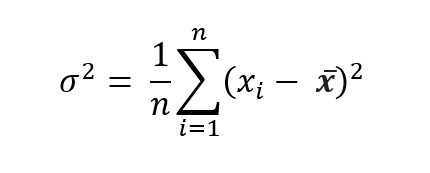

Distributions that go around a single constant with a few exceptions are also useless. In other words, any feature or distribution with close to 0 variance should be dropped.

Refer link - https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f




In [14]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [8]:
X, y = load_iris(return_X_y=True)
df = pd.DataFrame(X, columns = ['Column_A','Column_B','Column_C','Column_D'])
df.head()

,Column_A,Column_B,Column_C,Column_D
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1. VarianceThreshold works only for numeric data
2. Since each feature has different range of value, it's advised to normalise the data before VarianceThreshold

In [9]:
df = df.select_dtypes(include='number')
normalized_df = df / df.mean()
normalized_df.head()

,Column_A,Column_B,Column_C,Column_D
0,0.872790,1.144788,0.372539,0.166759
1,0.838562,0.981247,0.372539,0.166759
2,0.804335,1.046664,0.345929,0.166759
3,0.787222,1.013956,0.399148,0.166759
4,0.855676,1.177497,0.372539,0.166759


In [10]:
normalized_df.var() # Variance of the feature 

Column_A    0.020082
Column_B    0.020325
Column_C    0.220659
Column_D    0.403925
dtype: float64

In [13]:
vt = VarianceThreshold(threshold=.03)
# Fit
_ = vt.fit(normalized_df)
# Get the mask
mask = vt.get_support()
# Subset the DataFrame
df_final = normalized_df.loc[:, mask]
df_final.columns

Index(['Column_C', 'Column_D'], dtype='object')

Types of Feature Selection methods - https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold
